In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [29]:
# This allows the display of more than one variable in a cell
# without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
df = pd.read_csv('resources/PovertyReport.csv')
df
df['Textbox98']

,Textbox98,Textbox99,state_National,total_est_pct2,total_est_pct_Bmin2,total_est_pct_Bmax2,under18_pct2,under18_pct_Bmin2,under18_pct_Bmax2
0,All people in poverty (2021),Children ages 0-17 in poverty (2021),Alabama,16.3,15.9,16.7,22.7,21.9,23.5
1,All people in poverty (2021),Children ages 0-17 in poverty (2021),Alaska,10.8,10.3,11.3,13.5,12.7,14.3
2,All people in poverty (2021),Children ages 0-17 in poverty (2021),Arizona,12.9,12.6,13.2,17.8,17.2,18.4
3,All people in poverty (2021),Children ages 0-17 in poverty (2021),Arkansas,16.0,15.6,16.4,21.8,21.0,22.6
4,All people in poverty (2021),Children ages 0-17 in poverty (2021),California,12.3,12.2,12.4,15.8,15.5,16.1
...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0      All people in poverty (2021)
1      All people in poverty (2021)
2      All people in poverty (2021)
3      All people in poverty (2021)
4      All people in poverty (2021)
                   ...             
101                             NaN
102                             NaN
103                             NaN
104                             NaN
105                             NaN
Name: Textbox98, Length: 106, dtype: object

In [31]:
df['total_est_pct2'] = df['total_est_pct2'].astype(float)

In [32]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [33]:
# Add abbreviation column to DataFrame
df['Abbreviation'] = df['state_National'].map(state_abbreviations)

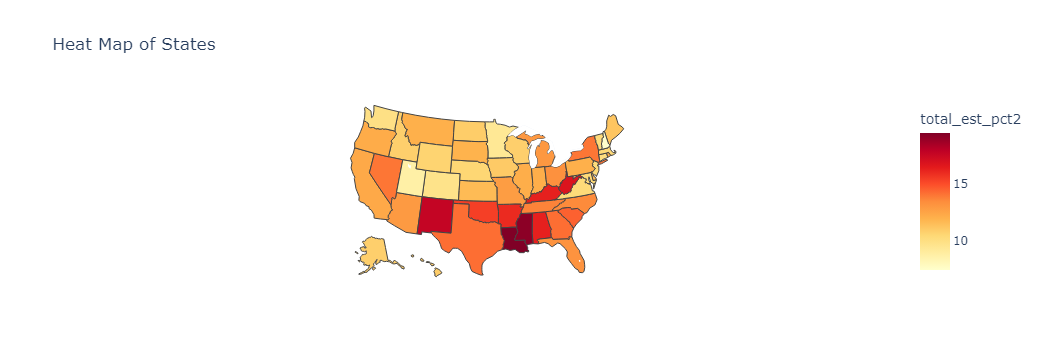

In [34]:
# Create the choropleth map
fig = px.choropleth(df,
                    locations='Abbreviation',
                    locationmode="USA-states",
                    color='total_est_pct2',
                    scope="usa",
                    color_continuous_scale="YlOrRd",  # or any other color scale
                    title="Heat Map of States")

# Show the figure
fig.show()